#Xg_boost regression

importing the dependencies

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


importing the boston house price dataset

In [20]:
house_price_dataset = pd.read_csv('/content/Boston-house-price-data.csv')

In [21]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
house_price_dataset.shape

(506, 14)

In [23]:
house_price_dataset['PRICE']=house_price_dataset['MEDV']

In [31]:
house_price_dataset=house_price_dataset.drop(columns='MEDV',axis=1)


In [32]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [33]:
house_price_dataset.shape

(506, 14)

In [34]:
#cheking for messing values
house_price_dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [35]:
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#understanding the correlation between various features in the dataset

In [37]:
correlation = house_price_dataset.corr()

<Axes: >

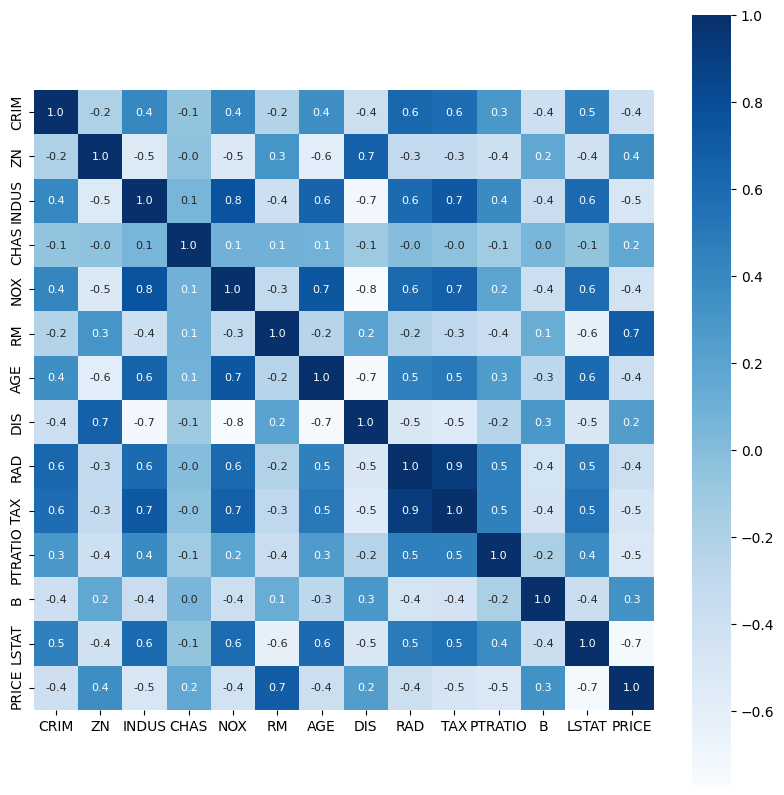

In [40]:
# constructuoin a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [44]:
x=house_price_dataset.drop(columns='PRICE',axis=1)
y=house_price_dataset['PRICE']

In [53]:
 #splitting the data
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [54]:
x_train.shape


(404, 13)

In [55]:
x_test.shape


(102, 13)

#model training

In [56]:
model= XGBRegressor()

In [57]:
model.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#evaluation

In [65]:
#prediction on training data
train_price_prediction=model.predict(x_train)
root_squared_error=metrics.r2_score(y_train,train_price_prediction) #sholud be closer to zero
mean_absolute_error = metrics.mean_absolute_error(y_train,train_price_prediction)
print(root_squared_error)
print(mean_absolute_error)

0.9999980039471451
0.0091330346494618


#visualizing the actual prices and predicted prices

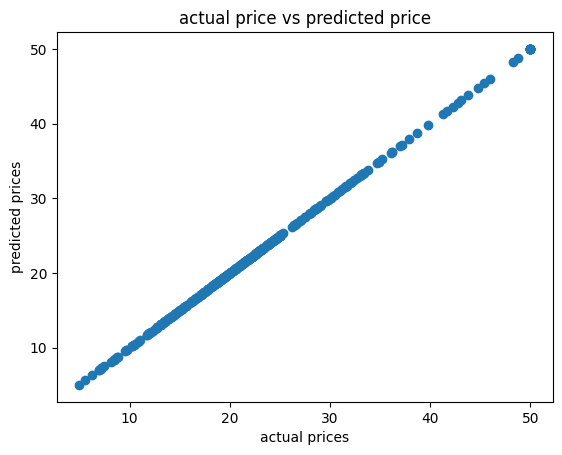

In [66]:
plt.scatter(y_train,train_price_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('actual price vs predicted price')
plt.show()

In [67]:
#prediction on testing data
price_prediction=model.predict(x_test)
root_squared_error=metrics.r2_score(y_test,price_prediction) #sholud be closer to zero
mean_absolute_error = metrics.mean_absolute_error(y_test,price_prediction)
print('r squared error :' ,root_squared_error)
print('mean absolute error :' ,mean_absolute_error)

r squared error : 0.9051721149855378
mean absolute error : 2.0748727686264927


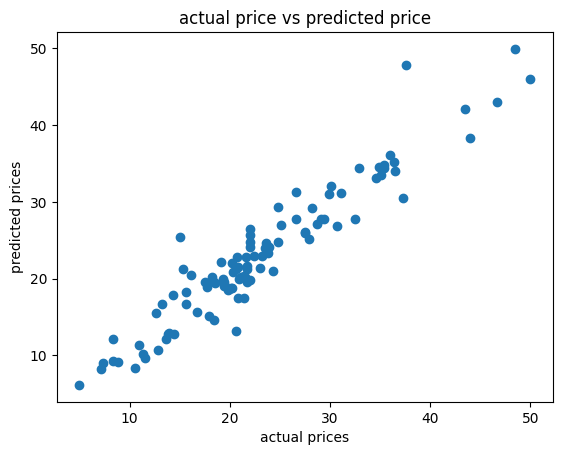

In [70]:
plt.scatter(y_test,price_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('actual price vs predicted price')
plt.show()